Importing libraries


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn


Defining parameters

In [10]:
# Fortis stock price 
spot_price = 138.90

# Long put
strike_price_long_put = 135
premium_long_put = 4

# Long call
strike_price_long_call = 145 
premium_long_call = 3.50

# Stock price range at expiration of the put
sT = np.arange(0.7*spot_price,1.3*spot_price,1)

# Call payoff </br>
We define a function that calculates the payoff from buying a call option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the call option and premium of the call option as input. It returns the call option payoff.


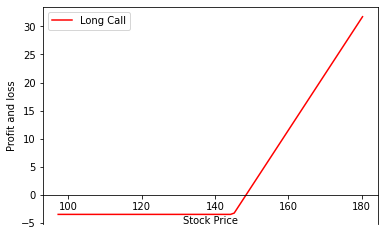

In [11]:
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium


payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_call, label='Long Call', color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


# Put payoff </br>
We define a function that calculates the payoff from buying a put option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the put option and premium of the put option as input. It returns the put option payoff.


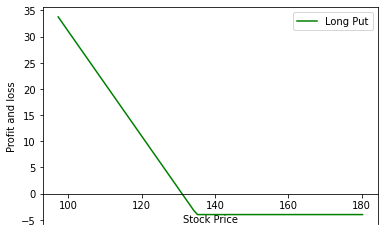

In [12]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium


payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, label='Long Put', color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


# Strangle payoff


Max Profit: Unlimited
Max Loss: -7.5


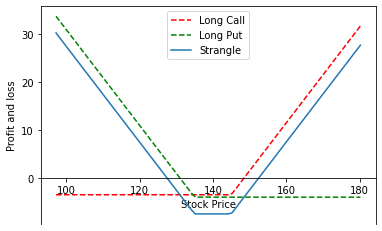

In [13]:
payoff_strangle = payoff_long_call + payoff_long_put

print("Max Profit: Unlimited")
print("Max Loss:", min(payoff_strangle))

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')

ax.plot(sT, payoff_long_call, '--', label='Long Call', color='r')
ax.plot(sT, payoff_long_put, '--', label='Long Put', color='g')

ax.plot(sT, payoff_strangle, label='Strangle')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


the above Payoff plot the maximum anyone can lose is the total premium paid for holding both call and put positions i.e. INR 7.50 in my case. This is when the strike price falls between the two options that we have purchased at the time of its expiry.

On the other hand, there is no limit for the profit that you can gain once the stock price moves significantly in any direction.
